In [1]:
pip install xgBoost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
credit_card_data=pd.read_csv("credit_card_clean (1).csv")

In [5]:
credit_card_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Data Understanding

In [6]:
credit_card_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

### Exploring the variable
ID : ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

Target variable
default.payment.next.month: Default payment (1=yes, 0=no)

Note: NT is Taiwain Dollars

In [7]:
credit_card_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [8]:
credit_card_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

### Data Preparation

In [9]:
del credit_card_data['ID']

In [10]:
credit_card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,highschool,married,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,male,highschool,single,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,male,university,single,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,male,highschool,married,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
credit_card_data["SEX"]=le.fit_transform(credit_card_data["SEX"])
credit_card_data["EDUCATION"]=le.fit_transform(credit_card_data["EDUCATION"])
credit_card_data["MARRIAGE"]=le.fit_transform(credit_card_data["MARRIAGE"])

In [14]:
credit_card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [15]:
credit_card_data.dtypes

LIMIT_BAL    float64
SEX            int32
EDUCATION      int32
MARRIAGE       int32
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

### Model Building

In [16]:
x= credit_card_data.drop('DEFAULT', axis=1)
y= credit_card_data['DEFAULT']

In [17]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,0,3,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,0,3,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,0,3,0,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,3,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,1,0,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [18]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [21]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
5830,140000.0,0,3,0,28,0,0,0,0,0,...,135820.0,84829.0,86753.0,88808.0,7000.0,5820.0,3829.0,3753.0,3808.0,4744.0
20650,20000.0,1,3,2,25,0,0,-1,0,0,...,3347.0,4426.0,1906.0,942.0,5006.0,5000.0,2000.0,0.0,900.0,0.0
6849,70000.0,0,3,2,55,0,0,0,0,0,...,57625.0,45675.0,46236.0,46758.0,2124.0,2311.0,1622.0,1674.0,1677.0,1697.0
11455,60000.0,0,1,0,48,0,0,0,0,0,...,37418.0,37543.0,35447.0,35641.0,2000.0,1900.0,1500.0,1300.0,1300.0,1300.0
13428,50000.0,0,1,2,22,2,2,2,0,0,...,50245.0,9246.0,18992.0,9697.0,9289.0,300.0,332.0,400.0,358.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15696,80000.0,1,0,2,33,0,0,0,0,0,...,77738.0,77235.0,76835.0,34751.0,3300.0,4100.0,2000.0,0.0,0.0,0.0
13634,190000.0,0,3,2,30,0,0,0,0,0,...,191861.0,155967.0,153193.0,156494.0,8900.0,6200.0,5500.0,5600.0,5800.0,5600.0
15205,160000.0,0,3,0,29,0,0,0,2,0,...,6854.0,3759.0,3164.0,3000.0,4000.0,2230.0,0.0,16.0,16.0,81.0
22185,290000.0,0,3,2,28,0,0,0,0,0,...,45913.0,44656.0,24692.0,7208.0,15000.0,20000.0,37092.0,20000.0,7208.0,34000.0


In [22]:
x_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
24332,50000.0,1,3,0,49,2,2,0,0,0,...,47582.0,21391.0,21867.0,19774.0,0.0,2500.0,1300.0,2000.0,700.0,1000.0
25427,140000.0,0,3,2,26,0,0,0,-1,-1,...,3776.0,3776.0,3776.0,4173.0,1119.0,1000.0,3776.0,3776.0,4173.0,1000.0
28634,190000.0,0,0,0,36,-1,-1,-1,-1,0,...,-2.0,6381.0,6383.0,817.0,4923.0,0.0,6383.0,2.0,0.0,1809.0
19488,150000.0,0,3,0,37,2,2,2,2,0,...,110405.0,106317.0,30906.0,31457.0,11600.0,4800.0,0.0,1240.0,1200.0,1200.0
2928,50000.0,1,0,2,27,0,0,0,0,2,...,45408.0,48279.0,47406.0,48553.0,1800.0,1729.0,3600.0,0.0,2055.0,2100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20383,20000.0,1,3,2,23,0,0,0,0,0,...,17993.0,18698.0,19075.0,20498.0,1605.0,1605.0,1310.0,687.0,1735.0,0.0
512,360000.0,1,0,2,28,-1,-1,-1,-1,-1,...,3978.0,1743.0,2828.0,50537.0,53228.0,3997.0,1750.0,2853.0,51041.0,3219.0
27797,280000.0,0,3,0,26,0,-1,-1,-1,-1,...,4712.0,1728.0,2076.0,1709.0,1200.0,4720.0,1728.0,2076.0,1709.0,7508.0
12366,200000.0,1,0,0,37,-1,0,0,0,0,...,132534.0,116331.0,111178.0,105907.0,7000.0,5000.0,4500.0,5000.0,5000.0,4300.0


In [23]:
y_train

5830     0
20650    0
6849     0
11455    0
13428    0
        ..
15696    1
13634    1
15205    0
22185    0
22854    0
Name: DEFAULT, Length: 24000, dtype: int64

In [24]:
y_test

24332    1
25427    0
28634    0
19488    0
2928     0
        ..
20383    0
512      0
27797    0
12366    0
13126    0
Name: DEFAULT, Length: 6000, dtype: int64

### Model Training

In [25]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [26]:
ada_class= AdaBoostClassifier()
rf_class= RandomForestClassifier()
gbm_class= GradientBoostingClassifier()
xgbm_class= XGBClassifier()
lgbm_class= LGBMClassifier()

In [27]:
%%time
ada_class.fit(x_train,y_train)

CPU times: total: 2.03 s
Wall time: 2.93 s


AdaBoostClassifier()

In [28]:
%%time
rf_class.fit(x_train,y_train)

CPU times: total: 7.3 s
Wall time: 11.6 s


RandomForestClassifier()

In [29]:
%%time
gbm_class.fit(x_train,y_train)

CPU times: total: 11.5 s
Wall time: 14 s


GradientBoostingClassifier()

In [30]:
%%time
xgbm_class.fit(x_train,y_train)

CPU times: total: 2.33 s
Wall time: 446 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
%%time
lgbm_class.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3260
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
CPU times: total: 1.45 s
Wall time: 1.18 s


LGBMClassifier()

In [34]:
rf_class.predict(x_test)
ada_class.predict(x_test)
gbm_class.predict(x_test)
xgbm_class.predict(x_test)
lgbm_class.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
y_pred_rf=rf_class.predict(x_test)
y_pred_ada=ada_class.predict(x_test)
y_pred_gbm=gbm_class.predict(x_test)
y_pred_xgbm=xgbm_class.predict(x_test)
y_pred_lgbm=lgbm_class.predict(x_test)

### Evaluate the performance

In [36]:
print("Accuracy of Random forest",accuracy_score(y_test, y_pred_rf))
print("Accuracy of Adaboost",accuracy_score(y_test, y_pred_ada))
print("Accuracy of GBM",accuracy_score(y_test, y_pred_gbm))
print("Accuracy of XGBM",accuracy_score(y_test, y_pred_xgbm))
print("Accuracy of LGBM",accuracy_score(y_test, y_pred_lgbm))

Accuracy of Random forest 0.8236666666666667
Accuracy of Adaboost 0.8196666666666667
Accuracy of GBM 0.8283333333333334
Accuracy of XGBM 0.8203333333333334
Accuracy of LGBM 0.8265


In [37]:
rf_features=rf_class.feature_importances_
ada_features=ada_class.feature_importances_
gbm_features=gbm_class.feature_importances_
xgbm_features=xgbm_class.feature_importances_
lgbm_features=lgbm_class.feature_importances_

In [38]:
rf_features

array([0.05902015, 0.01272602, 0.01882873, 0.01295979, 0.06772745,
       0.08887678, 0.05094794, 0.03356657, 0.01941251, 0.01792926,
       0.01719205, 0.06138559, 0.05530951, 0.05171888, 0.05137112,
       0.04979638, 0.05058005, 0.05187447, 0.04818609, 0.0464383 ,
       0.04330975, 0.04481463, 0.04602797])

In [39]:
x_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [40]:
feature_imp=pd.DataFrame({'features':x_train.columns,
              'rf_features':rf_features,
              'ada_features':ada_features,
              'gbm_features':gbm_features,
              'xgbm_features':xgbm_features,
              'lgbm_features':lgbm_features,
              
    
})

In [41]:
feature_importance=feature_imp.sort_values(by='ada_features',ascending=False)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='lgbm_features', ylabel='features'>

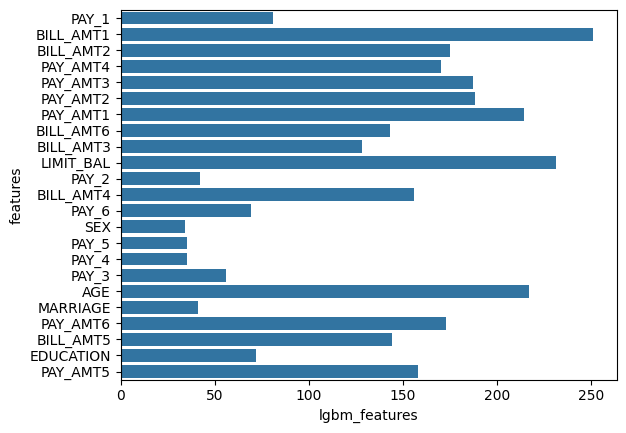

In [44]:
sns.barplot(data=feature_importance,
    x='lgbm_features',
    y='features')